# Display MRI image

---

**FLAIR**: Fluid-Attenuated Inversion Recovery

**ROI**: Region of Interrest

**T1/T2 weighted**: one of the basic pulse sequences in MRI and demonstrates differences in the T1/T2 relaxation times of tissues. 

The T1 relaxation time, also known as the spin-lattice relaxation time or longitudinal relaxation time, is a measure of how quickly the net magnetization vector (NMV) recovers to its ground state in the direction of B0.

[More about MRI parameters](https://www.kaggle.com/code/pranav2109/mri-classification-data-pipeline-pytorch)

[Using U-Net network for efficient brain tumor segmentation in MRI images](https://www.sciencedirect.com/science/article/pii/S2772442522000429)

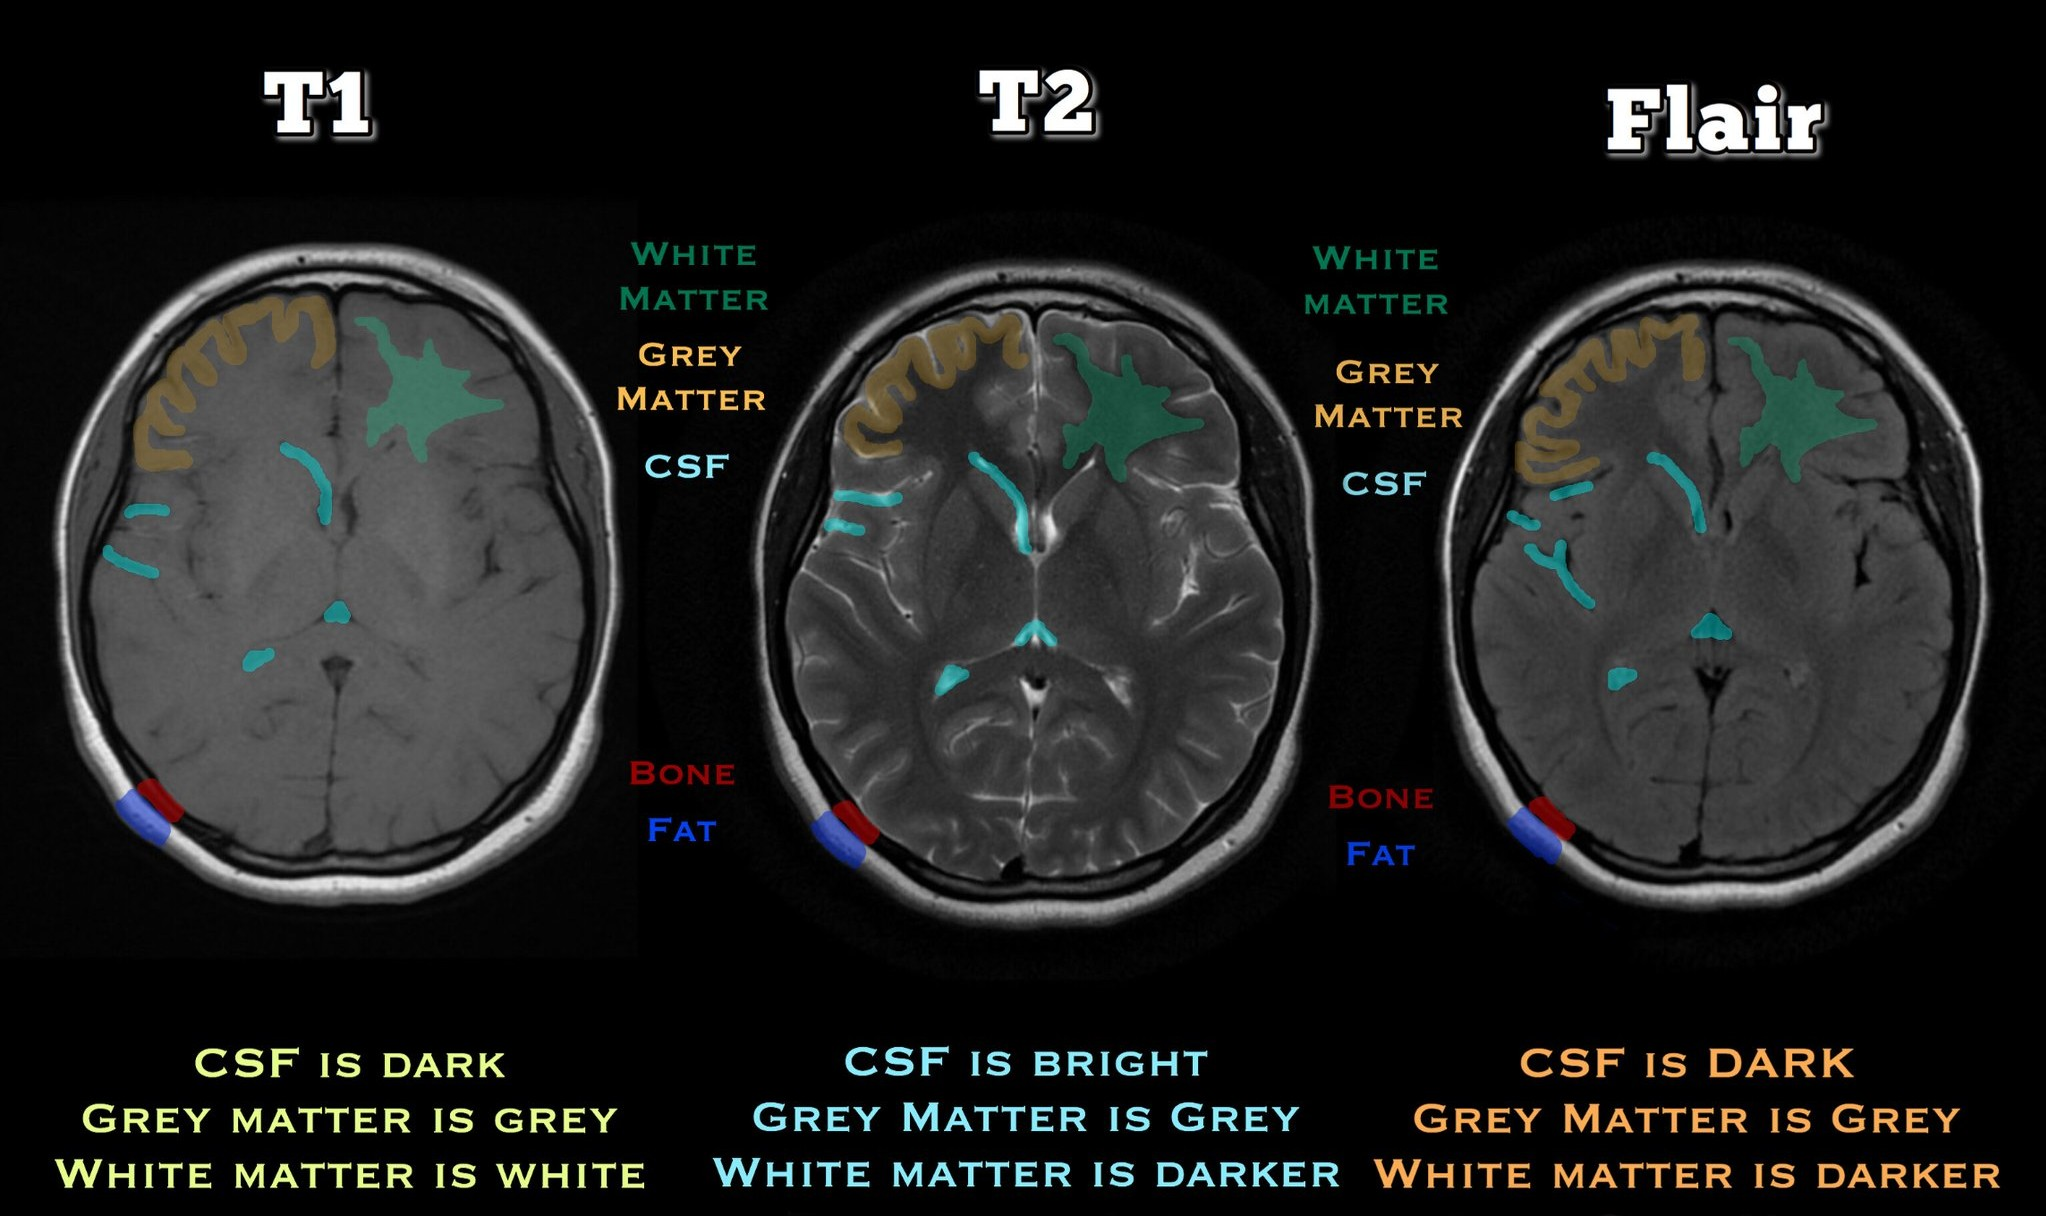



In [ ]:
!pip install nibabel matplotlib itkwidgets

In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import torch
import h5py
from ipywidgets import interact, IntSlider, ToggleButtons, fixed
from tqdm.auto import tqdm
import os

In [4]:
def load_nii(file_path):
    return nib.load(file_path).get_fdata()

In [ ]:
num_patient = 1
file_path = f'sub-00{num_patient:03d}/anat/sub-00{num_patient:03d}_acq-T2sel_FLAIR.nii.gz'
img_tensor = torch.tensor(load_nii(file_path), dtype=torch.float32)
print(img_tensor.shape)
# slice_x = img_tensor[0, img_tensor.shape[1] // 2, :, :].numpy()
# print(img_tensor)
plt.imshow(img_tensor[:, img_tensor.shape[0]//2, :], cmap='gray')

In [2]:
def plot_patient_MRI():    
    def plot_explore_slices(num_patient, axes): 
        file_paths = [f'OpenNeuro_ds004199/sub-00{num_patient:03d}/anat/sub-00{num_patient:03d}_acq-T2sel_FLAIR.nii.gz',
                        f'OpenNeuro_ds004199/sub-00{num_patient:03d}/anat/sub-00{num_patient:03d}_acq-tse3dvfl_FLAIR.nii.gz',
                        f'OpenNeuro_ds004199/sub-00{num_patient:03d}/anat/sub-00{num_patient:03d}_acq-corhipp4mm_FLAIR.nii.gz', # remove (18)
                        f'OpenNeuro_ds004199/sub-00{num_patient:03d}/anat/sub-00{num_patient:03d}_acq-traAcpc4mm_FLAIR.nii.gz', # remove (27)
                        f'OpenNeuro_ds004199/sub-00{num_patient:03d}/anat/sub-00{num_patient:03d}_acq-traacpcVNS_FLAIR.nii.gz', # remove (53)
                        f'OpenNeuro_ds004199/sub-00{num_patient:03d}/anat/sub-00{num_patient:03d}_acq-32ch10_FLAIR.nii.gz',
                        f'OpenNeuro_ds004199/sub-00{num_patient:03d}/anat/sub-00{num_patient:03d}_acq-cor3mmOPT_FLAIR.nii.gz',
                        f'OpenNeuro_ds004199/sub-00{num_patient:03d}/anat/sub-00{num_patient:03d}_acq-tra4mm_FLAIR.nii.gz', # remove (112)
                        f'OpenNeuro_ds004199/sub-00{num_patient:03d}/anat/sub-00{num_patient:03d}_acq-corAcpc4mm_FLAIR.nii.gz', # remove (120)
                        f'OpenNeuro_ds004199/sub-00{num_patient:03d}/anat/sub-00{num_patient:03d}_acq-cor4mm_FLAIR.nii.gz' # remove (130)
                        ]
           
        roi_paths = [f'OpenNeuro_ds004199/sub-00{num_patient:03d}/anat/sub-00{num_patient:03d}_acq-T2sel_FLAIR_roi.nii.gz',
                    f'OpenNeuro_ds004199/sub-00{num_patient:03d}/anat/sub-00{num_patient:03d}_acq-tse3dvfl_FLAIR_roi.nii.gz',
                    f'OpenNeuro_ds004199/sub-00{num_patient:03d}/anat/sub-00{num_patient:03d}_acq-corhipp4mm_FLAIR_roi.nii.gz',
                    f'OpenNeuro_ds004199/sub-00{num_patient:03d}/anat/sub-00{num_patient:03d}_acq-traAcpc4mm_FLAIR_roi.nii.gz',
                    f'OpenNeuro_ds004199/sub-00{num_patient:03d}/anat/sub-00{num_patient:03d}_acq-traacpcVNS_FLAIR_roi.nii.gz',
                    f'OpenNeuro_ds004199/sub-00{num_patient:03d}/anat/sub-00{num_patient:03d}_acq-32ch10_FLAIR_roi.nii.gz',
                    f'OpenNeuro_ds004199/sub-00{num_patient:03d}/anat/sub-00{num_patient:03d}_acq-cor3mmOPT_FLAIR_roi.nii.gz',
                    f'OpenNeuro_ds004199/sub-00{num_patient:03d}/anat/sub-00{num_patient:03d}_acq-tra4mm_FLAIR_roi.nii.gz',
                    f'OpenNeuro_ds004199/sub-00{num_patient:03d}/anat/sub-00{num_patient:03d}_acq-corAcpc4mm_FLAIR_roi.nii.gz',
                    f'OpenNeuro_ds004199/sub-00{num_patient:03d}/anat/sub-00{num_patient:03d}_acq-cor4mm_FLAIR_roi.nii.gz'
                    ]
        
        for i in range(len(file_paths)):
            if not os.path.exists(file_paths[i]):
                continue
            file_path = file_paths[i]
            roi_path = roi_paths[i]
            if not os.path.exists(roi_paths[i]):
                roi_path = None
            break
         
        img_tensor = torch.tensor(load_nii(file_path), dtype=torch.float32)
        if roi_path is not None:
            roi_tensor = torch.tensor(load_nii(roi_path), dtype=torch.float32)
        else:
            roi_tensor = None

        def explore_slices(layer):
            
            fig, ax = plt.subplots(1, 2, figsize=(10, 5)) 
            ax[0].grid(False)
            ax[1].grid(False)
            
            if axes == 0:
                ax[0].imshow(img_tensor[layer, :, :].T, cmap="gray", origin="lower")
                if roi_tensor is not None:
                    # ax[1].imshow(img_tensor[layer, :, :].T, cmap="gray", origin="lower")
                    ax[1].imshow(roi_tensor[layer, :, :].T, cmap="gray", alpha=1)
            elif axes == 1:
                ax[0].imshow(img_tensor[:, layer, :].T, cmap="gray", origin="lower")
                if roi_tensor is not None:
                    ax[1].imshow(img_tensor[:, layer, :].T, cmap="gray", origin="lower")
                    ax[1].imshow(roi_tensor[:, layer, :].T, cmap="autumn", alpha=0.4, origin="lower")
            elif axes == 2:
                ax[0].imshow(img_tensor[:, :, layer].T, cmap="gray", origin="lower")
                if roi_tensor is not None:
                    ax[1].imshow(img_tensor[:, :, layer].T, cmap="gray", origin="lower")
                    ax[1].imshow(roi_tensor[:, :, layer].T, cmap="autumn",alpha=0.4, origin="lower")
            else:
                raise ValueError("Invalid axes value. Choose between 'Sagittal', 'Coronal', 'Axial'")
            
            return layer 

        interact(explore_slices, num_patient=IntSlider(value=1, min=1, max=170, description='Subject num_patientber'), layer=(0, img_tensor.shape[axes] - 1))
    
    interact(plot_explore_slices, num_patient=[i for i in range(1, 171)], axes=ToggleButtons(
        options=[0, 1, 2],
        description='Axes:',
        button_style='info',
        tooltips=['Sagittal', 'Coronal', 'Axial'],
    ))


In [5]:
plot_patient_MRI()

interactive(children=(Dropdown(description='num_patient', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, …

In [41]:
num_patient = 18
path = f'sub-00{num_patient:03d}/anat/sub-00{num_patient:03d}_acq-corhipp4mm_FLAIR.nii.gz'
zeros_tensor = torch.zeros(256, 256)
print(zeros_tensor.shape)
img_tensor = torch.tensor(load_nii(path), dtype=torch.float32)
slice_x = img_tensor[167, :, :].reshape_as(torch.zeros_like(zeros_tensor)).numpy()
plt.imshow(slice_x, cmap='gray')

torch.Size([256, 256])


RuntimeError: shape '[256, 256]' is invalid for input of size 14592

# HDF5 file

---

In [ ]:
!pip install h5py

In [ ]:
ouptut_file = 'MRI_dataset_split_reduced.h5'

def save_to_hdf5(output_file):
    with h5py.File(output_file, 'w') as hf:
        train_group = hf.create_group("train")
        test_group = hf.create_group("test")
        for idx in tqdm(range(1, 60)):
            data_paths = [
                f'sub-00{idx:03d}/anat/sub-00{idx:03d}_acq-T2sel_FLAIR.nii.gz',
                f'sub-00{idx:03d}/anat/sub-00{idx:03d}_acq-tse3dvfl_FLAIR.nii.gz'
                f'sub-00{idx:03d}/anat/sub-00{idx:03d}_acq-corhipp4mm_FLAIR.nii.gz',
                f'sub-00{idx:03d}/anat/sub-00{idx:03d}_acq-traAcpc4mm_FLAIR.nii.gz',
                f'sub-00{idx:03d}/anat/sub-00{idx:03d}_acq-traacpcVNS_FLAIR.nii.gz',
                f'sub-00{idx:03d}/anat/sub-00{idx:03d}_acq-32ch10_FLAIR.nii.gz',
                f'sub-00{idx:03d}/anat/sub-00{idx:03d}_acq-cor3mmOPT_FLAIR.nii.gz',
                f'sub-00{idx:03d}/anat/sub-00{idx:03d}_acq-tra4mm_FLAIR.nii.gz',
                f'sub-00{idx:03d}/anat/sub-00{idx:03d}_acq-corAcpc4mm_FLAIR.nii.gz',
                f'sub-00{idx:03d}/anat/sub-00{idx:03d}_acq-cor4mm_FLAIR.nii.gz'
                ]

            roi_paths = [f'sub-00{idx:03d}/anat/sub-00{idx:03d}_acq-T2sel_FLAIR_roi.nii.gz',
                            f'sub-00{idx:03d}/anat/sub-00{idx:03d}_acq-tse3dvfl_FLAIR_roi.nii.gz'
                            f'sub-00{idx:03d}/anat/sub-00{idx:03d}_acq-corhipp4mm_FLAIR_roi.nii.gz',
                            f'sub-00{idx:03d}/anat/sub-00{idx:03d}_acq-traAcpc4mm_FLAIR_roi.nii.gz',
                            f'sub-00{idx:03d}/anat/sub-00{idx:03d}_acq-traacpcVNS_FLAIR_roi.nii.gz',
                            f'sub-00{idx:03d}/anat/sub-00{idx:03d}_acq-32ch10_FLAIR_roi.nii.gz',
                            f'sub-00{idx:03d}/anat/sub-00{idx:03d}_acq-cor3mmOPT_FLAIR_roi.nii.gz',
                            f'sub-00{idx:03d}/anat/sub-00{idx:03d}_acq-tra4mm_FLAIR_roi.nii.gz',
                            f'sub-00{idx:03d}/anat/sub-00{idx:03d}_acq-corAcpc4mm_FLAIR_roi.nii.gz',
                            f'sub-00{idx:03d}/anat/sub-00{idx:03d}_acq-cor4mm_FLAIR_roi.nii.gz'
                        ]
            for data_path, roi_path in zip(data_paths, roi_paths):
                if os.path.exists(data_path):
                    # Load data volumes
                    data_volume = load_nii(data_path) 
                    roi_volume = load_nii(roi_path) if os.path.exists(roi_path) else np.zeros_like(data_volume)

                    # Create groups for each subject
                    if idx > 20:
                        subject_group = train_group.create_group(f"subject_{idx}")
                        subject_group.create_dataset("data", data=data_volume, compression="gzip", compression_opts=9)
                        subject_group.create_dataset("roi", data=roi_volume, compression="gzip", compression_opts=9)
                    else:
                        subject_group = test_group.create_group(f"subject_{idx}")
                        subject_group.create_dataset("data", data=data_volume, compression="gzip", compression_opts=9)
                        subject_group.create_dataset("roi", data=roi_volume, compression="gzip", compression_opts=9)
                    break

    print(f"HDF5 file saved to: {output_file}")


In [ ]:
save_to_hdf5(ouptut_file)

100%|██████████| 59/59 [08:29<00:00,  8.64s/it]

HDF5 file saved to: MRI_dataset_split_reduced.h5


In [ ]:

with h5py.File(ouptut_file, 'r') as hf:
    print("Keys:", list(hf.keys()))
    print("Number of subjects:", len(hf.keys()))
    print("Train subjects:", list(hf['train'].keys()))
    for subject in hf['train'].keys():
        print(f"Subject: {subject}")
        data = hf['train'][subject]['data'][:]
        roi = hf['train'][subject]['roi'][:]
        print(f"  Data shape: {data.shape}, ROI shape: {roi.shape}")


In [3]:
!pip install natsort


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
def get_patient_file_paths(num_patient):
    file_paths = [
        f'OpenNeuro_ds004199/sub-00{num_patient:03d}/anat/sub-00{num_patient:03d}_acq-T2sel_FLAIR.nii.gz',
        f'OpenNeuro_ds004199/sub-00{num_patient:03d}/anat/sub-00{num_patient:03d}_acq-tse3dvfl_FLAIR.nii.gz'
        # f'sub-00{num_patient:03d}/anat/sub-00{num_patient:03d}_acq-corhipp4mm_FLAIR.nii.gz',
        # f'sub-00{num_patient:03d}/anat/sub-00{num_patient:03d}_acq-traAcpc4mm_FLAIR.nii.gz',
        # f'sub-00{num_patient:03d}/anat/sub-00{num_patient:03d}_acq-traacpcVNS_FLAIR.nii.gz',
        f'OpenNeuro_ds004199/sub-00{num_patient:03d}/anat/sub-00{num_patient:03d}_acq-32ch10_FLAIR.nii.gz'
        # f'sub-00{num_patient:03d}/anat/sub-00{num_patient:03d}_acq-cor3mmOPT_FLAIR.nii.gz',
        # f'sub-00{num_patient:03d}/anat/sub-00{num_patient:03d}_acq-tra4mm_FLAIR.nii.gz',
        # f'sub-00{num_patient:03d}/anat/sub-00{num_patient:03d}_acq-corAcpc4mm_FLAIR.nii.gz',
        # f'sub-00{num_patient:03d}/anat/sub-00{num_patient:03d}_acq-cor4mm_FLAIR.nii.gz'
    ]
    roi_paths = [
        f'OpenNeuro_ds004199/sub-00{num_patient:03d}/anat/sub-00{num_patient:03d}_acq-T2sel_FLAIR_roi.nii.gz',
        f'OpenNeuro_ds004199/sub-00{num_patient:03d}/anat/sub-00{num_patient:03d}_acq-tse3dvfl_FLAIR_roi.nii.gz'
        # f'sub-00{num_patient:03d}/anat/sub-00{num_patient:03d}_acq-corhipp4mm_FLAIR_roi.nii.gz',
        # f'sub-00{num_patient:03d}/anat/sub-00{num_patient:03d}_acq-traAcpc4mm_FLAIR_roi.nii.gz',
        # f'sub-00{num_patient:03d}/anat/sub-00{num_patient:03d}_acq-traacpcVNS_FLAIR_roi.nii.gz',
        f'OpenNeuro_ds004199/sub-00{num_patient:03d}/anat/sub-00{num_patient:03d}_acq-32ch10_FLAIR_roi.nii.gz'
        # f'sub-00{num_patient:03d}/anat/sub-00{num_patient:03d}_acq-cor3mmOPT_FLAIR_roi.nii.gz',
        # f'sub-00{num_patient:03d}/anat/sub-00{num_patient:03d}_acq-tra4mm_FLAIR_roi.nii.gz',
        # f'sub-00{num_patient:03d}/anat/sub-00{num_patient:03d}_acq-corAcpc4mm_FLAIR_roi.nii.gz',
        # f'sub-00{num_patient:03d}/anat/sub-00{num_patient:03d}_acq-cor4mm_FLAIR_roi.nii.gz'
    ]
    for file_path, roi_path in zip(file_paths, roi_paths):
        if os.path.exists(file_path):
            if os.path.exists(roi_path):
                return file_path, roi_path
            else:
                return file_path, None
    return None, None


In [6]:
def pad_slice_to_target_shape(slice_data, target_shape=(256, 256)):
    """Pads a slice to the target shape with zeros."""

    pad_height = max(0, target_shape[0] - slice_data.shape[0])
    pad_width = max(0, target_shape[1] - slice_data.shape[1])

    pad_top = pad_height // 2
    pad_bottom = pad_height - pad_top
    pad_left = pad_width // 2
    pad_right = pad_width - pad_left

    padded_slice = np.pad(slice_data, ((pad_top, pad_bottom), (pad_left, pad_right)), mode='constant', constant_values=0)
    return padded_slice

# def pad_slice_to_target_shape(slice_data, target_shape=(256, 256)):
#     """Pads a slice to the target shape with zeros."""
#     
#     padded_slice = np.pad(slice_data, ((0, target_shape[0] - slice_data.shape[0]), (0, target_shape[1] - slice_data.shape[1])), constant_values=0)
#     return padded_slice

In [ ]:
def flatten_shuffle_save_all_dims(output_file,start_num_patients, num_patients=170):
    data_slices = []
    roi_slices = []

    for patient_id in tqdm(range(start_num_patients, num_patients + 1)):
        data_path, roi_path = get_patient_file_paths(patient_id)
        
        if data_path:
            data_volume = load_nii(data_path).astype(np.float32)
            roi_volume = load_nii(roi_path).astype(np.float32) if roi_path else np.zeros_like(data_volume)

            # Axial slices (z-axis)
            for slice_idx in range(20, data_volume.shape[2]-20):
                data_slices.append(pad_slice_to_target_shape(data_volume[:, :, slice_idx]))
                roi_slices.append(pad_slice_to_target_shape(roi_volume[:, :, slice_idx]))

            # Sagittal slices (x-axis)
            for slice_idx in range(20, data_volume.shape[0]-20):
                data_slices.append(pad_slice_to_target_shape(data_volume[slice_idx, :, :]))
                roi_slices.append(pad_slice_to_target_shape(roi_volume[slice_idx, :, :]))
        
            # Coronal slices (y-axis)
            for slice_idx in range(20, data_volume.shape[1]-20):
                data_slices.append(pad_slice_to_target_shape(data_volume[:, slice_idx, :]))
                roi_slices.append(pad_slice_to_target_shape(roi_volume[:, slice_idx, :]))

    # Convert to numpy arrays for efficient shuffling
    data_slices = np.array(data_slices)
    roi_slices = np.array(roi_slices)

    # Shuffle slices while keeping data and roi aligned
    shuffle_indices = np.random.permutation(data_slices.shape[0])
    data_slices = data_slices[shuffle_indices]
    roi_slices = roi_slices[shuffle_indices]

    # Save the shuffled slices to an HDF5 file
    with h5py.File(output_file, 'w') as hf:
        hf.create_dataset("data", data=data_slices, compression="gzip", compression_opts=9)
        hf.create_dataset("roi", data=roi_slices, compression="gzip", compression_opts=9)

    print(f"Flattened, shuffled slices from all dimensions saved to {output_file}")


In [3]:
def clean_and_save_dataset_all_dims(output_file, start_num_patients, num_patients=170):
    data_slices = []
    roi_slices = []

    middle_slices_count = 10  # Number of middle slices to take when no ROI
    surrounding_slices = 5  # Number of slices before and after the ROI region

    for patient_id in tqdm(range(start_num_patients, num_patients + 1)):
        data_path, roi_path = get_patient_file_paths(patient_id)
        
        if data_path:
            data_volume = load_nii(data_path).astype(np.float32)
            roi_volume = load_nii(roi_path).astype(np.float32) if roi_path else np.zeros_like(data_volume)

            # **Axial slices (z-axis)**
            roi_slices_indices = np.where(np.sum(roi_volume, axis=(0, 1)) > 0)[0]
            if len(roi_slices_indices) > 0:  # ROI exists
                min_idx = max(0, roi_slices_indices[0] - surrounding_slices)
                max_idx = min(data_volume.shape[2], roi_slices_indices[-1] + surrounding_slices + 1)
                for slice_idx in range(min_idx, max_idx):
                    data_slices.append(pad_slice_to_target_shape(data_volume[:, :, slice_idx]))
                    roi_slices.append(pad_slice_to_target_shape(roi_volume[:, :, slice_idx]))
            else:  # No ROI, take middle slices
                mid_start = data_volume.shape[2] // 2 - middle_slices_count // 2
                mid_end = mid_start + middle_slices_count
                for slice_idx in range(mid_start, mid_end):
                    data_slices.append(pad_slice_to_target_shape(data_volume[:, :, slice_idx]))
                    roi_slices.append(pad_slice_to_target_shape(roi_volume[:, :, slice_idx]))

            # **Sagittal slices (x-axis)**
            roi_slices_indices = np.where(np.sum(roi_volume, axis=(1, 2)) > 0)[0]
            if len(roi_slices_indices) > 0:  # ROI exists
                min_idx = max(0, roi_slices_indices[0] - surrounding_slices)
                max_idx = min(data_volume.shape[0], roi_slices_indices[-1] + surrounding_slices + 1)
                for slice_idx in range(min_idx, max_idx):
                    data_slices.append(pad_slice_to_target_shape(data_volume[slice_idx, :, :]))
                    roi_slices.append(pad_slice_to_target_shape(roi_volume[slice_idx, :, :]))
            else:  # No ROI, take middle slices
                mid_start = data_volume.shape[0] // 2 - middle_slices_count // 2
                mid_end = mid_start + middle_slices_count
                for slice_idx in range(mid_start, mid_end):
                    data_slices.append(pad_slice_to_target_shape(data_volume[slice_idx, :, :]))
                    roi_slices.append(pad_slice_to_target_shape(roi_volume[slice_idx, :, :]))

            # **Coronal slices (y-axis)**
            roi_slices_indices = np.where(np.sum(roi_volume, axis=(0, 2)) > 0)[0]
            if len(roi_slices_indices) > 0:  # ROI exists
                min_idx = max(0, roi_slices_indices[0] - surrounding_slices)
                max_idx = min(data_volume.shape[1], roi_slices_indices[-1] + surrounding_slices + 1)
                for slice_idx in range(min_idx, max_idx):
                    data_slices.append(pad_slice_to_target_shape(data_volume[:, slice_idx, :]))
                    roi_slices.append(pad_slice_to_target_shape(roi_volume[:, slice_idx, :]))
            else:  # No ROI, take middle slices
                mid_start = data_volume.shape[1] // 2 - middle_slices_count // 2
                mid_end = mid_start + middle_slices_count
                for slice_idx in range(mid_start, mid_end):
                    data_slices.append(pad_slice_to_target_shape(data_volume[:, slice_idx, :]))
                    roi_slices.append(pad_slice_to_target_shape(roi_volume[:, slice_idx, :]))

    # Convert to numpy arrays for efficient shuffling
    data_slices = np.array(data_slices)
    roi_slices = np.array(roi_slices)

    # Shuffle slices while keeping data and roi aligned
    shuffle_indices = np.random.permutation(data_slices.shape[0])
    data_slices = data_slices[shuffle_indices]
    roi_slices = roi_slices[shuffle_indices]

    # Save the shuffled slices to an HDF5 file
    with h5py.File(output_file, 'w') as hf:
        hf.create_dataset("data", data=data_slices, compression="gzip", compression_opts=9)
        hf.create_dataset("roi", data=roi_slices, compression="gzip", compression_opts=9)

    print(f"Cleaned, filtered, and shuffled slices from all dimensions saved to {output_file}")


In [8]:
clean_and_save_dataset_all_dims('train_dataset.h5', 41, 170)

  0%|          | 0/130 [00:00<?, ?it/s]

Cleaned, filtered, and shuffled slices from all dimensions saved to train_dataset.h5


In [9]:
flatten_shuffle_save_all_dims('small_axial_test.h5', 41, 58)

  0%|          | 0/18 [00:00<?, ?it/s]

Flattened, shuffled slices from all dimensions saved to small_axial_test.h5


In [4]:
def flatten_shuffle_save_all_dims_incremental(output_file, start_num_patients, num_patients=170):
    slice_shape = (256, 256) 

    with h5py.File(output_file, 'w') as hf:
        # Initialize datasets for data and ROI with resizable dimensions
        data_dset = hf.create_dataset(
            "data", shape=(0, *slice_shape), maxshape=(None, *slice_shape), dtype=np.float32, compression="gzip", compression_opts=9
        )
        roi_dset = hf.create_dataset(
            "roi", shape=(0, *slice_shape), maxshape=(None, *slice_shape), dtype=np.float32, compression="gzip", compression_opts=9
        )

        for patient_id in tqdm(range(start_num_patients, num_patients + 1)):
            data_path, roi_path = get_patient_file_paths(patient_id)
            
            if data_path:
                data_volume = load_nii(data_path).astype(np.float32)
                roi_volume = load_nii(roi_path).astype(np.float32) if roi_path else np.zeros_like(data_volume)

                # Temporary lists to hold slices for the current patient
                patient_data_slices = []
                patient_roi_slices = []

                # Axial slices (z-axis)
                for slice_idx in range(50, data_volume.shape[2] - 50):
                    patient_data_slices.append(pad_slice_to_target_shape(data_volume[:, :, slice_idx]))
                    patient_roi_slices.append(pad_slice_to_target_shape(roi_volume[:, :, slice_idx]))

                # Sagittal slices (x-axis)
                for slice_idx in range(10, data_volume.shape[0] - 5):
                    patient_data_slices.append(pad_slice_to_target_shape(data_volume[slice_idx, :, :]))
                    patient_roi_slices.append(pad_slice_to_target_shape(roi_volume[slice_idx, :, :]))

                # Coronal slices (y-axis)
                for slice_idx in range(30, data_volume.shape[1] - 45):
                    patient_data_slices.append(pad_slice_to_target_shape(data_volume[:, slice_idx, :]))
                    patient_roi_slices.append(pad_slice_to_target_shape(roi_volume[:, slice_idx, :]))

                # Convert current patient's slices to numpy arrays
                patient_data_slices = np.array(patient_data_slices)  # Shape (N, 256, 256)
                patient_roi_slices = np.array(patient_roi_slices)    # Shape (N, 256, 256)

                # Shuffle patient slices while keeping data and roi aligned
                shuffle_indices = np.random.permutation(patient_data_slices.shape[0])
                patient_data_slices = patient_data_slices[shuffle_indices]
                patient_roi_slices = patient_roi_slices[shuffle_indices]

                # Append shuffled patient slices to HDF5 datasets
                current_len = data_dset.shape[0]
                new_len = current_len + patient_data_slices.shape[0]
                data_dset.resize(new_len, axis=0)
                roi_dset.resize(new_len, axis=0)
                data_dset[current_len:new_len, :, :] = patient_data_slices
                roi_dset[current_len:new_len, :, :] = patient_roi_slices

    print(f"Flattened, shuffled slices from all dimensions incrementally saved to {output_file}")


In [11]:
flatten_shuffle_save_all_dims_incremental("train_MRI_dataset_centered(2).h5", start_num_patients=39, num_patients=170)

  0%|          | 0/132 [00:00<?, ?it/s]

Flattened, shuffled slices from all dimensions incrementally saved to train_MRI_dataset_centered(2).h5


In [ ]:
def test_hdf5_file(file_path):
    try:
        with h5py.File(file_path, 'r') as hf:
            # Check datasets exist
            if "data" not in hf or "roi" not in hf:
                print("Error: Datasets 'data' or 'roi' not found in the file.")
                return
            
            data_dset = hf["data"]
            roi_dset = hf["roi"]
            
            # Print dataset sizes
            print(f"Data shape: {data_dset.shape}")
            print(f"ROI shape: {roi_dset.shape}")
            
            # Check if the datasets have the same number of slices
            if data_dset.shape[0] != roi_dset.shape[0]:
                print("Error: Data and ROI dataset sizes do not match.")
                return
            
            print("Datasets are aligned in size.")

            # Test a few random slices for consistency
            num_slices = data_dset.shape[0]
            print(f"Number of slices: {num_slices}")
            
            for idx in np.random.choice(num_slices, size=5, replace=False):
                data_slice = data_dset[idx]
                roi_slice = roi_dset[idx]
                
                # Validate shape of slices
                if data_slice.shape != roi_slice.shape:
                    print(f"Error: Data and ROI slice shapes mismatch at index {idx}.")
                    print(f"Data shape: {data_slice.shape}, ROI shape: {roi_slice.shape}")
                else:
                    print(f"Slice {idx}: Shapes are consistent. Data max: {data_slice.max()}, ROI max: {roi_slice.max()}")
                    print(f"Slice shapes: {data_slice.shape}, {roi_slice.shape}")

            print("Test completed successfully.")
    except Exception as e:
        print(f"Error testing the file: {e}")


Data shape: (42416, 256, 256)
ROI shape: (42416, 256, 256)
Datasets are aligned in size.
Number of slices: 42416
Slice 31850: Shapes are consistent. Data max: 339.9979248046875, ROI max: 0.0
Slice shapes: (256, 256), (256, 256)
Slice 34495: Shapes are consistent. Data max: 187.99896240234375, ROI max: 0.0
Slice shapes: (256, 256), (256, 256)
Slice 40320: Shapes are consistent. Data max: 255.99966430664062, ROI max: 0.0
Slice shapes: (256, 256), (256, 256)
Slice 26193: Shapes are consistent. Data max: 355.9976806640625, ROI max: 0.0
Slice shapes: (256, 256), (256, 256)
Slice 11135: Shapes are consistent. Data max: 348.0020751953125, ROI max: 0.0
Slice shapes: (256, 256), (256, 256)
Test completed successfully.


In [ ]:
test_hdf5_file("train_MRI_dataset_all_dims.h5")

Keys: ['data', 'roi']
Number of subjects: 2
Train subjects: 18313
Train subjects: 18313
(256, 256)


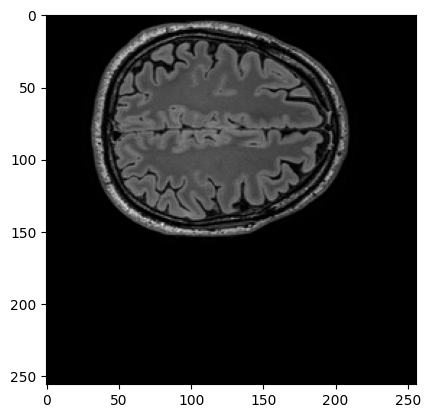

In [28]:
with h5py.File('test_MRI_dataset_all_dims.h5', 'r') as hf:
    print("Keys:", list(hf.keys()))
    print("Number of subjects:", len(hf.keys()))
    print("Train subjects:", len(hf['data']))
    print("Train subjects:", len(hf['roi']))
    data = hf['data'][1]
    print(data.shape)
    plt.imshow(data, cmap='gray')

# CNNs

---

CNN's usual elements:
- Convolutional layers
- Activation function
- Pooling layers  
- Fully connected layers

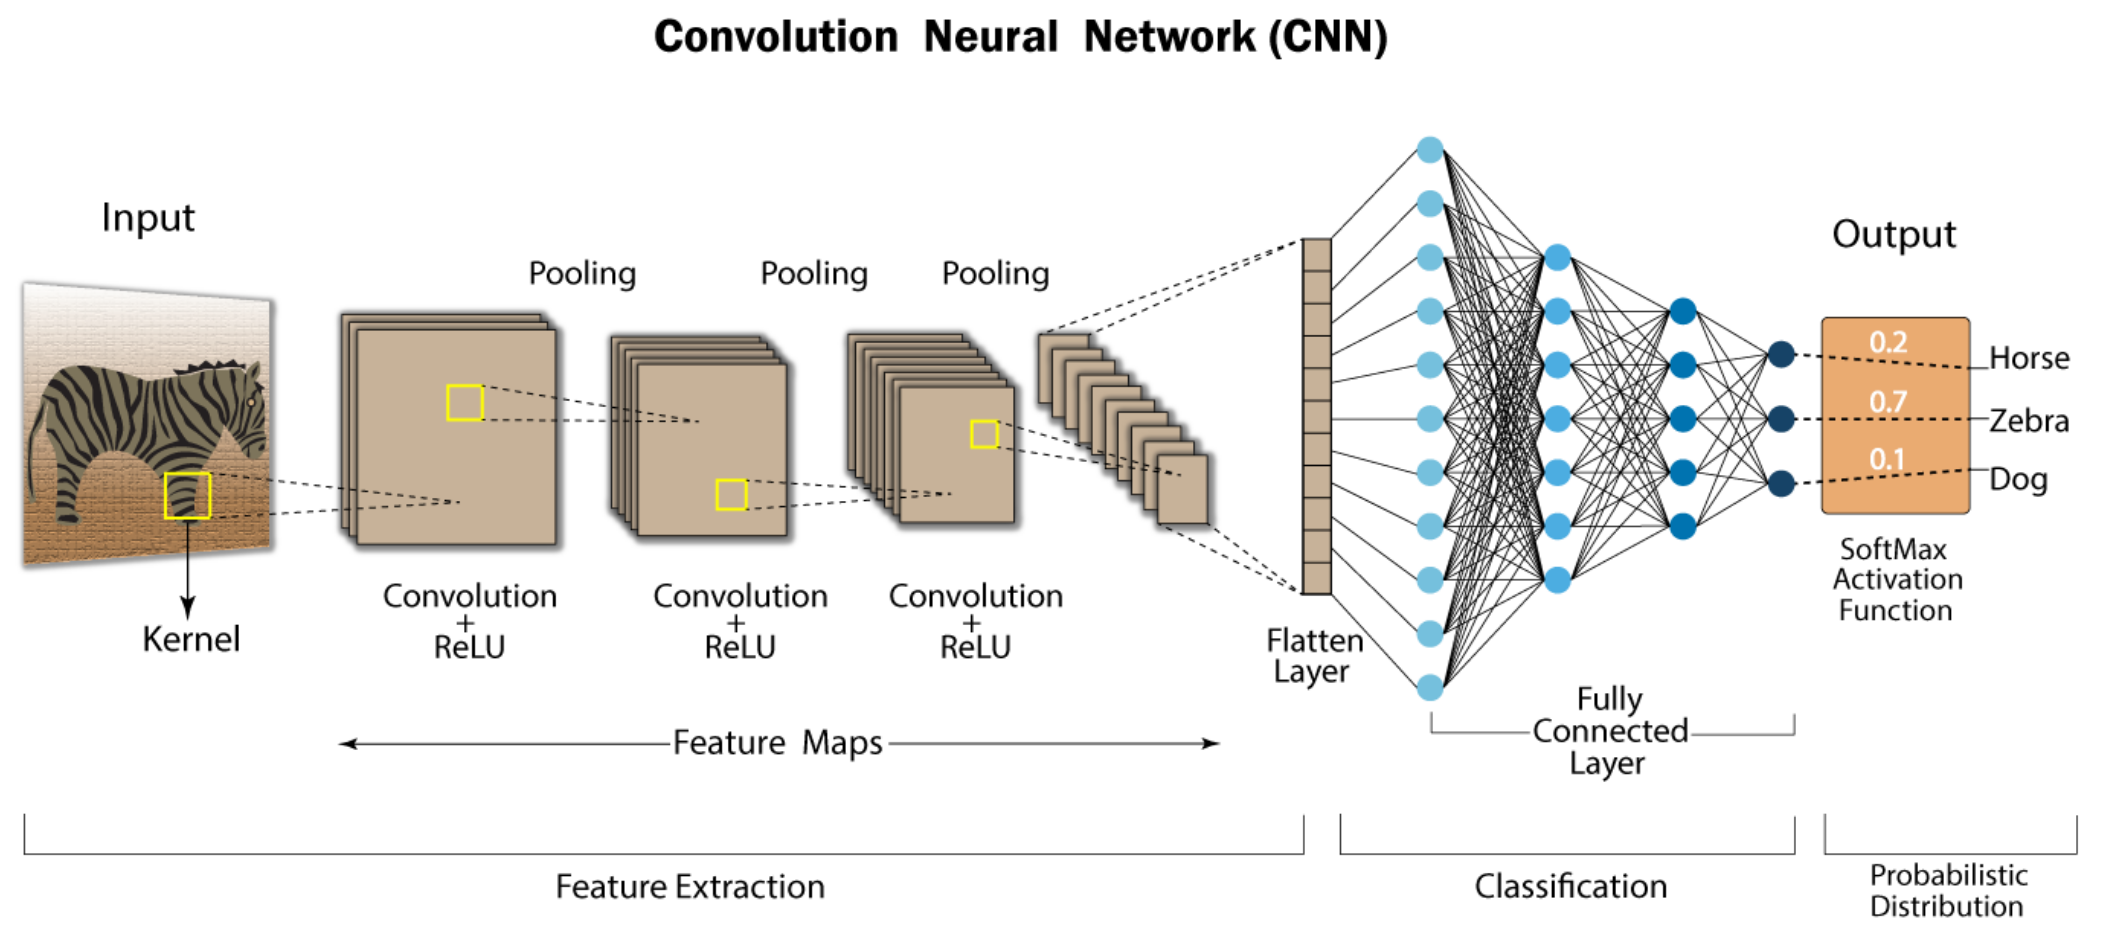

**Feature Doubling**: After each max pooling step, the subsequent convolutional layer doubles the number of filters used. For example, if a layer starts with 64 feature channels, it will have 128 channels after the next pooling and convolution operations. By doubling the number of feature channels, the network can maintain or even increase its capacity to represent information despite the reduction in spatial resolution. This is crucial because the risk of losing important details increases as the image size reduces. [link](https://viso.ai/deep-learning/u-net-a-comprehensive-guide-to-its-architecture-and-applications/)


### Activation function

An Activation Function decides whether a neuron should be activated or not.
$$
e.g.\quad \sigma(x) = \frac{1}{1 + e^{-x}},\quad \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}},\quad \text{ReLU}(x) = \max(0, x)
$$

**Why do we need activation function ?**

Without activation function, the model become linear performing the same transformation at each layer which just become a linear regression model and is unable to learn complex task.

[More activation function](https://www.v7labs.com/blog/neural-networks-activation-functions#gaussian-error-linear-unit-(gelu))

### Pooling layers

Pooling is down sampling, where a lower resolution version of an input signal is created that still contains the large or important structural elements, without the fine detail that may not be as useful to the task. It is added after an activation function (e.g. ReLu).

![alt text](image.png)

### Fully connected layers



### Convolution

Ref:
- [animation to represent padding and stride influence on the output](https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md)
- [Paper on convolution aritmetic](https://arxiv.org/pdf/1603.07285)
- [convolution neural network explanation](https://developersbreach.com/convolution-neural-network-deep-learning/)

A convolutional layer’s output shape is affected by the <span style="color:red">shape of its input</span> as well as the <span style="color:red">choice of kernel shape</span>, <span style="color:red">zero padding</span> and <span style="color:red">strides</span>.

$$
Convolution formula: 
z_{ij} = \sum_{c=1}^{C} \sum_{k=-s}^{s} \sum_{l=-s}^{s} w_{kl}^{c} x_{i+k, j+l}^{c} + b \\ 
where~w~is~a~convolutional~kernel~of~size~C \times f \times f
$$

C : channels, it correspond to the depht of the input to usualy store RGB data

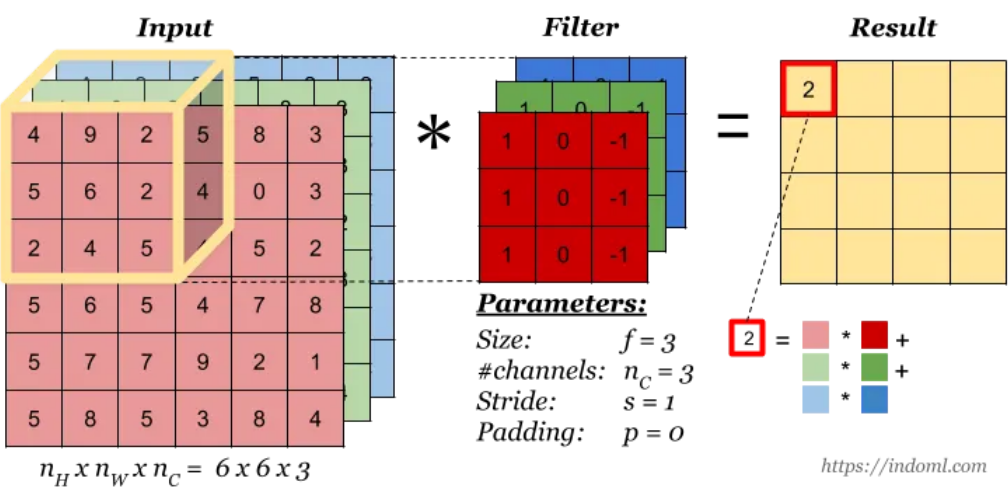

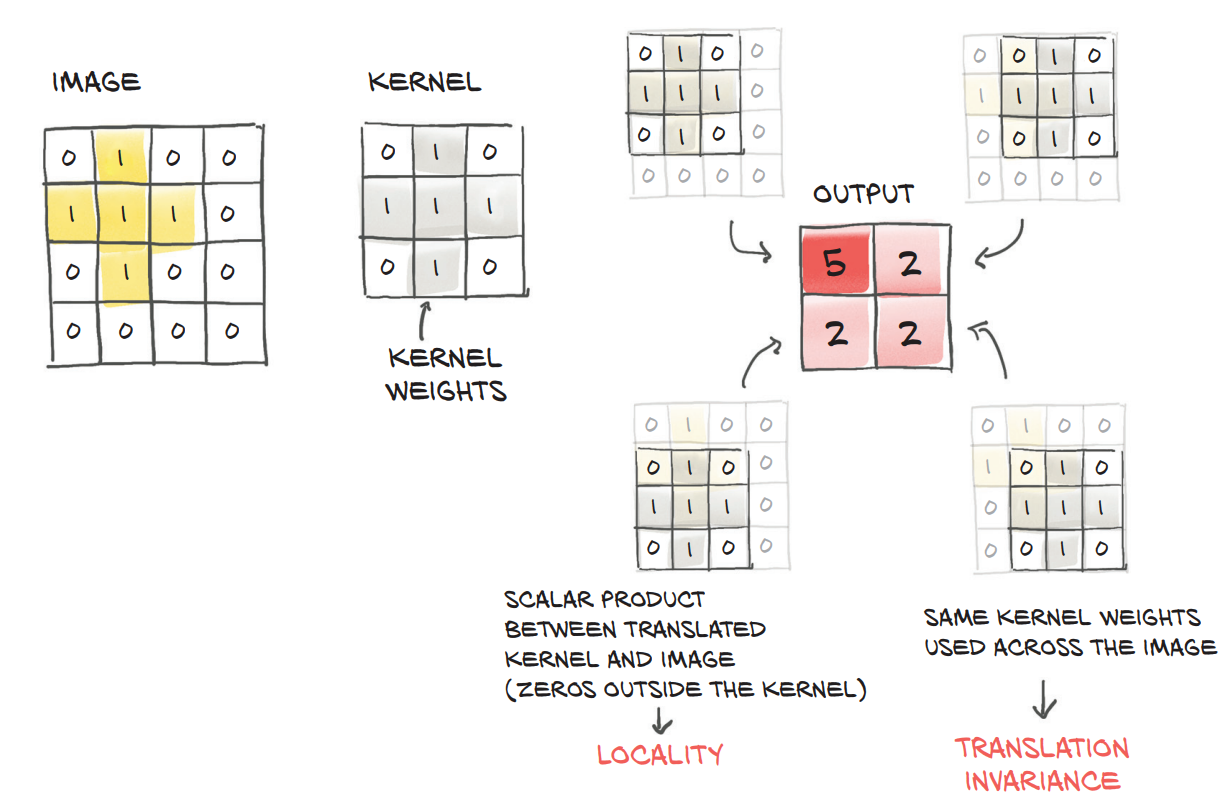

**Kernel/filter**:
- We have different filters like blurring (average smoothing, Gaussian smoothing, median smoothing, etc.), edge detection (Laplacian, Sobel, Scharr, Prewitt, etc.), and sharpening
- it is used to do an element-wise multiplication with the input then the sum (convolution operation).

**Zero padding**: 
- used to make dimension of output equal to input by adding zeros to the input frame of matrix. Padding allows more spaces for kernel to cover image and is accurate for analysis of images. Due to padding, information on the borders of images are also preserved similarly as at the center of image.

*Padding=1 and strides=1*
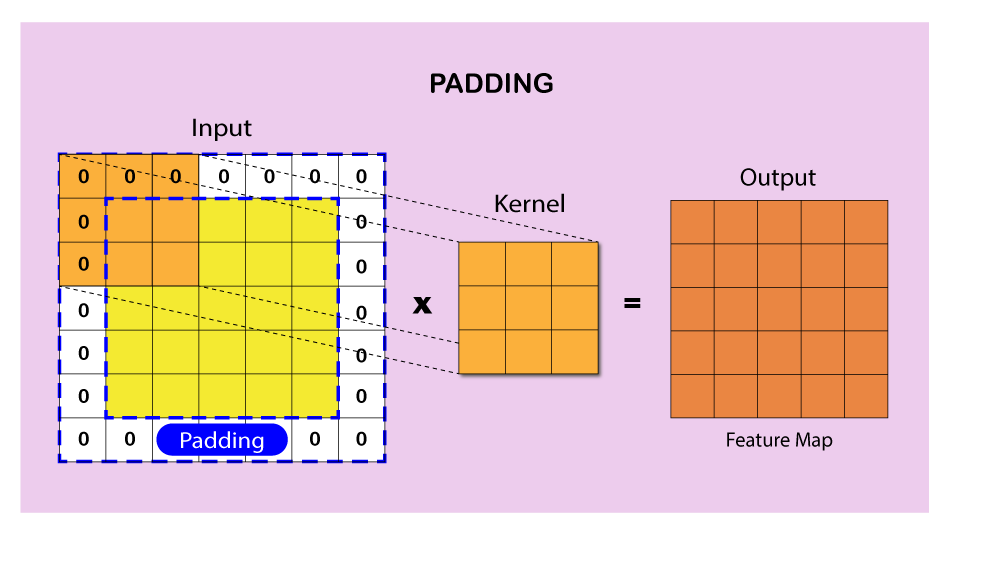 

**Strides**: 
- controls how filter/window/kernel convolves over input i.e., the number of pixels shifts over the input matrix.
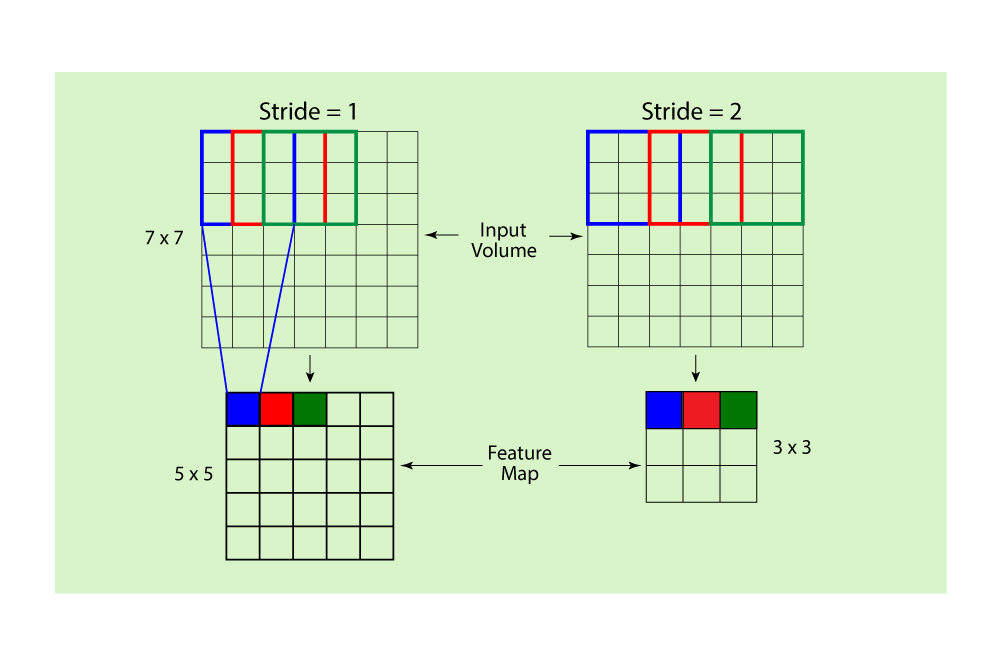


``nn.Conv2d`` expects a $ B \times C \times H \times W $ as input.

For odd-sized kernels, this results in images that are one-half the convolution kernel’s width (in our case, 3//2 = 1) smaller on each side.

# Other parameters

---

**Criterion**(or loss function): metric used to measure the difference between the model's predictions and the actual target values.



**Loss**:
- [Tversky loss](https://www.researchgate.net/publication/317673840_Tversky_loss_function_for_image_segmentation_using_3D_fully_convolutional_deep_networks)
- [masked dice loss](https://link.springer.com/chapter/10.1007/978-3-319-67558-9_28)

# U-net model

---

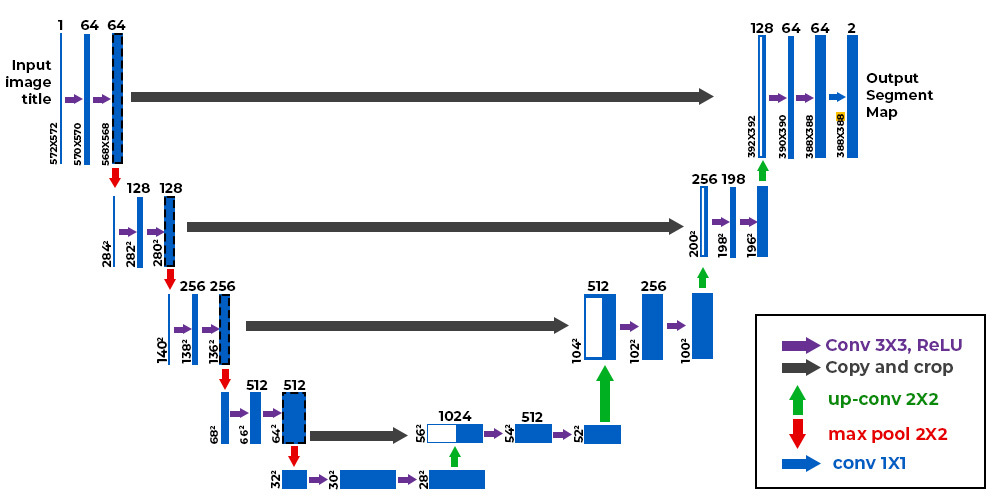

Ref:
- [Different Unet architectures](https://www.nature.com/articles/s41598-022-18646-2/tables/1)
- [Res-Unet and Attention Res-Unet](https://www.sciltp.com/journals/ijndi/2024/2/411)


From the same article :
![UnetArchitectures](https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41598-022-18646-2/MediaObjects/41598_2022_18646_Fig2_HTML.png?as=webp)




| Filter size | padding | Stride | n-layers | Activation func | Conv channels | BatchNorm |
| ----------- | ------- | ------ | -------- | --------------- | ------------- | --------- | 
| | | | | | | |

In [ ]:
!pip install torch-summary

In [7]:
import torch.nn as nn
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import pandas as pd
from tqdm.auto import tqdm
import h5py
import numpy as np

In [8]:
class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DoubleConv, self).__init__()
        self.double_conv_op = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(num_features=out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(num_features=out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.double_conv_op(x)

class DownSample(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DownSample, self).__init__()
        self.conv = DoubleConv(in_channels, out_channels)
        self.pool = nn.MaxPool2d(kernel_size=2)

    def forward(self, x):
        down = self.conv(x)
        p = self.pool(down)
        return down, p

class UpSample(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UpSample, self).__init__()
        self.up = nn.ConvTranspose2d(in_channels, in_channels // 2, kernel_size=2, stride=2)
        self.conv = DoubleConv(in_channels, out_channels)

    def forward(self, x1, x2):
        x1 = self.up(x1)
        x = torch.cat([x1, x2], dim=1)
        return self.conv(x)

class Unet(nn.Module):
    def __init__(self, in_channels, num_features, depth=4, base_channels=64):
        """
        Modular U-Net implementation.

        :param in_channels: Number of input channels.
        :param num_features: Number of output features (channels).
        :param depth: Number of downsampling/upsampling layers.
        :param base_channels: Number of channels in the first convolutional layer.
        """
        super(Unet, self).__init__()
        self.depth = depth

        # Create downsampling layers
        self.down_layers = nn.ModuleList()
        in_ch = in_channels
        for i in range(depth):
            out_ch = base_channels * (2 ** i)
            self.down_layers.append(DownSample(in_ch, out_ch))
            in_ch = out_ch

        # Bottleneck
        self.bottle_neck = DoubleConv(in_ch, in_ch * 2)

        # Create upsampling layers
        self.up_layers = nn.ModuleList()
        for i in range(depth - 1, -1, -1):
            out_ch = base_channels * (2 ** i)
            self.up_layers.append(UpSample(in_ch * 2, out_ch))
            in_ch = out_ch // 2

        # Output layer
        self.out = nn.Conv2d(base_channels, out_channels=num_features, kernel_size=1)

    def forward(self, x):
        downs = []
        p = x

        # Apply downsampling
        for layer in self.down_layers:
            down, p = layer(p)
            downs.append(down)

        # Bottleneck
        b = self.bottle_neck(p)

        # Apply upsampling
        up = b
        for layer, down in zip(self.up_layers, reversed(downs)):
            up = layer(up, down)

        # Final output layer
        out = self.out(up)
        return torch.sigmoid(out)


### Class Dataset

In [ ]:
class MRIdataset_per_slice(Dataset):

  def __init__(self, mode='train', transform=None):
    """
    Initialize the dataset. Use lazy loading to load the data only when needed. 

    Args:
      mode: str, 'train' or 'test'
      transform: torch transform
    """
    self.transform = transform
    self.MRIdata = pd.DataFrame(columns=['data_path', 'roi_path'])
    self.slice_counts = []
    if mode == 'train':
        start_idx, end_idx = 20, 171  # Training set range
    elif mode == 'test':
        start_idx, end_idx = 1, 20  # Test set range
    else:
        raise ValueError("Mode should be 'train' or 'test'")
    

    for idx in range(start_idx, end_idx):
            file_paths = [f'sub-00{idx:03d}/anat/sub-00{idx:03d}_acq-T2sel_FLAIR.nii.gz',
                            f'sub-00{idx:03d}/anat/sub-00{idx:03d}_acq-tse3dvfl_FLAIR.nii.gz'
                            # f'sub-00{idx:03d}/anat/sub-00{idx:03d}_acq-corhipp4mm_FLAIR.nii.gz', #
                            # f'sub-00{idx:03d}/anat/sub-00{idx:03d}_acq-traAcpc4mm_FLAIR.nii.gz', #
                            # f'sub-00{idx:03d}/anat/sub-00{idx:03d}_acq-traacpcVNS_FLAIR.nii.gz', #
                            f'sub-00{idx:03d}/anat/sub-00{idx:03d}_acq-32ch10_FLAIR.nii.gz',
                            f'sub-00{idx:03d}/anat/sub-00{idx:03d}_acq-cor3mmOPT_FLAIR.nii.gz',
                            # f'sub-00{idx:03d}/anat/sub-00{idx:03d}_acq-tra4mm_FLAIR.nii.gz', #
                            # f'sub-00{idx:03d}/anat/sub-00{idx:03d}_acq-corAcpc4mm_FLAIR.nii.gz', #
                            # f'sub-00{idx:03d}/anat/sub-00{idx:03d}_acq-cor4mm_FLAIR.nii.gz' #
                        ]

            roi_paths = [f'sub-00{idx:03d}/anat/sub-00{idx:03d}_acq-T2sel_FLAIR_roi.nii.gz',
                            f'sub-00{idx:03d}/anat/sub-00{idx:03d}_acq-tse3dvfl_FLAIR_roi.nii.gz'
                            # f'sub-00{idx:03d}/anat/sub-00{idx:03d}_acq-corhipp4mm_FLAIR_roi.nii.gz',
                            # f'sub-00{idx:03d}/anat/sub-00{idx:03d}_acq-traAcpc4mm_FLAIR_roi.nii.gz',
                            # f'sub-00{idx:03d}/anat/sub-00{idx:03d}_acq-traacpcVNS_FLAIR_roi.nii.gz',
                            f'sub-00{idx:03d}/anat/sub-00{idx:03d}_acq-32ch10_FLAIR_roi.nii.gz',
                            f'sub-00{idx:03d}/anat/sub-00{idx:03d}_acq-cor3mmOPT_FLAIR_roi.nii.gz',
                            # f'sub-00{idx:03d}/anat/sub-00{idx:03d}_acq-tra4mm_FLAIR_roi.nii.gz',
                            # f'sub-00{idx:03d}/anat/sub-00{idx:03d}_acq-corAcpc4mm_FLAIR_roi.nii.gz',
                            # f'sub-00{idx:03d}/anat/sub-00{idx:03d}_acq-cor4mm_FLAIR_roi.nii.gz'
                        ] 

            for  i in range(len(file_paths)): # file_path, roi_path in zip(file_paths, roi_paths):
                if os.path.exists(file_paths[i]):
                    roi_path = roi_paths[i] if os.path.exists(roi_paths[i]) else None
                    self.MRIdata = pd.concat([self.MRIdata, pd.DataFrame({'data_path': [file_paths[i]], 'roi_path': [roi_path]})], ignore_index=True)

                    data_volume = load_nii(file_paths[i])
                    self.slice_counts.append(data_volume.shape[2])
                    break
                elif i == len(file_paths) - 1:
                    print(f'File not found at {idx}.')

    self.cumulative_slices = [0] + list(np.cumsum(self.slice_counts))
    print(self.cumulative_slices)
    self.len = sum(self.slice_counts)

  def __len__(self):
    return self.len

  def __getitem__(self, idx):

    # we get the index of the patient
    vol_idx = next(i for i, v in enumerate(self.cumulative_slices) if idx < v) - 1
    # then the index of the slice
    slice_idx = idx - self.cumulative_slices[vol_idx]

    data_path = self.MRIdata.loc[vol_idx, 'data_path']
    roi_path = self.MRIdata.loc[vol_idx, 'roi_path']

    data_volume = load_nii(data_path).astype(np.float32)
    roi_volume = load_nii(roi_path).astype(np.float32) if roi_path is not None else np.zeros_like(data_volume)

    data_slice = data_volume[:, :, slice_idx]
    roi_slice = roi_volume[:, :, slice_idx] if roi_path is not None else np.zeros_like(data_slice)

    if self.transform:
        data_slice = self.transform(data_slice)
        roi_slice = self.transform(roi_slice)

    return data_slice, roi_slice


In [ ]:
class MRIdataset_per_slice_hdf5(Dataset):
  def __init__(self, hdf5_path='MRI_dataset.h5', mode='train', transform=None):
    """
    Initializes the dataset for either training or testing. The dataset must be stored in an HDF5 file.
    Args:
    - hdf5_path (str): Path to the HDF5 file.
    - mode (str): Dataset mode ('train' or 'test').
    - transform (callable): Transform to apply to each slice.
    """
    self.transform = transform
    self.mode = mode
    self.hdf5_path = hdf5_path
    if os.path.exists(hdf5_path) is False:
        raise FileNotFoundError(f"HDF5 file not found at path: {hdf5_path}")
    # Open the HDF5 file and load the group corresponding to the mode
    with h5py.File(hdf5_path, 'r') as hf:
        if mode not in hf.keys():
            raise ValueError(f"Mode {mode} not found in HDF5 file. Available groups: {list(hf.keys())}")
        self.MRIdata = {key: hf[mode][key] for key in hf[mode].keys()}
        self.slice_counts = [hf[mode][subject]['data'].shape[2] for subject in hf[mode].keys()]
    self.cumulative_slices = [0] + list(np.cumsum(self.slice_counts))
    self.len = sum(self.slice_counts)
    print(f"{mode.capitalize()} dataset loaded. Total slices: {self.len}")

  def __len__(self):
    return self.len

  def __getitem__(self, idx):

    # Determine the subject and slice index corresponding to the global index
    vol_idx = next(i for i, v in enumerate(self.cumulative_slices) if idx < v) - 1
    slice_idx = idx - self.cumulative_slices[vol_idx]
    # Load the data and ROI slice from the HDF5 file
    with h5py.File(self.hdf5_path, 'r') as hf:
        subject_key = list(self.MRIdata.keys())[vol_idx]
        data_volume = hf[self.mode][subject_key]['data'][:]
        roi_volume = hf[self.mode][subject_key]['roi'][:]
    # Extract the slice
    data_slice = data_volume[:, :, slice_idx]
    roi_slice = roi_volume[:, :, slice_idx]
    # Apply transformations
    if self.transform:
        data_slice = self.transform(data_slice)
        roi_slice = self.transform(roi_slice)

    return data_slice.type(torch.float32), roi_slice.type(torch.float32)


In [9]:
class MRIdataset_all_dims_hdf5(Dataset):
    def __init__(self, hdf5_path='MRI_dataset_all_dims.h5', transform=None):
        """
        Initializes the dataset from a flattened and shuffled HDF5 file.

        Args:
        - hdf5_path (str): Path to the HDF5 file.
        - transform (callable): Transform to apply to each slice.
        """
        self.transform = transform
        self.hdf5_path = hdf5_path

        if not os.path.exists(hdf5_path):
            raise FileNotFoundError(f"HDF5 file not found at path: {hdf5_path}")
        
        # Open the file to read the dataset dimensions
        with h5py.File(hdf5_path, 'r') as hf:
            if "data" not in hf or "roi" not in hf:
                raise ValueError(f"Datasets 'data' or 'roi' not found in the HDF5 file.")
            self.num_slices = hf["data"].shape[0]  # Total number of slices
            print(f"Dataset loaded. Total slices: {self.num_slices}")

    def __len__(self):
        return self.num_slices

    def __getitem__(self, idx):
        """
        Retrieves a slice and its corresponding ROI.

        Args:
        - idx (int): Index of the slice.

        Returns:
        - data_slice (torch.Tensor): The data slice.
        - roi_slice (torch.Tensor): The corresponding ROI slice.
        """
        with h5py.File(self.hdf5_path, 'r') as hf:
            # Load the slice directly from the HDF5 file
            data_slice = hf["data"][idx]
            roi_slice = hf["roi"][idx]

        # Apply transformations if any
        if self.transform:
            data_slice = self.transform(data_slice)
            roi_slice = self.transform(roi_slice)

        # Convert to PyTorch tensors
        return data_slice.type(torch.float32), roi_slice.type(torch.float32)

### Loss function

- [Dice Loss and BCE](https://www.kaggle.com/code/bigironsphere/loss-function-library-keras-pytorch)
- [loss function comparison](https://arxiv.org/pdf/2110.08322)

In [ ]:
class DiceLoss(nn.Module):
    def __init__(self, smooth=1.0):
        super(DiceLoss, self).__init__()
        self.smooth = smooth

    def forward(self, probs, targets):
        # Apply sigmoid to get probabilities in [0,1]
        # probs = torch.sigmoid(inputs)

        probs = probs.view(-1)
        targets = targets.view(-1)

        intersection = (probs * targets).sum()
        dice_score = (2. * intersection + self.smooth) / (probs.sum() + targets.sum() + self.smooth)

        dice_loss = 1 - dice_score
        return dice_loss

### Initialization of the model parameters

In [33]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transform = transforms.Compose([transforms.ToTensor()])

train_dataset = MRIdataset_all_dims_hdf5(hdf5_path='train_MRI_dataset_cleaned_2.h5', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=False, num_workers=0, pin_memory=False)

test_dataset = MRIdataset_all_dims_hdf5(hdf5_path='test_MRI_dataset_cleaned_2.h5', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=0, pin_memory=False)

Dataset loaded. Total slices: 10766
Dataset loaded. Total slices: 3276


torch.Size([1, 256, 256])


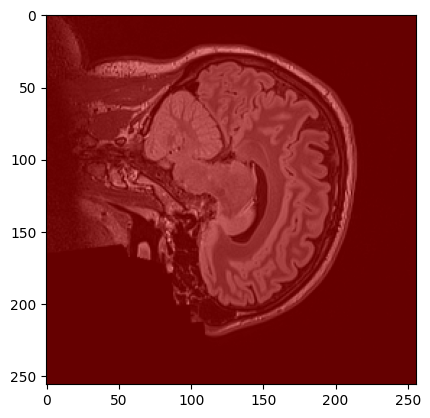

In [31]:
nb=1
print(train_dataset[nb][0].shape)
plt.imshow(train_dataset[nb][0].squeeze(), cmap='gray')
plt.imshow(train_dataset[nb][1].squeeze(), cmap='autumn', alpha=0.4)

In [51]:
EPOCHS = 3
LRate = 1e-4

model = Unet(in_channels=1, num_features=1).to(device)
criterion = nn.BCEWithLogitsLoss() # DiceLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LRate)

### Training loop and evaluation metrics

**F1 score**: $ F1 = 2 \times \frac{Precision \times Recall}{ Precision + Recall} $

Where:

- $ Precision = \frac{True~positive}{True~Positives + False~Positives} $ tous les pixels qui ont été prédis correctement dans la classe cible sur tous les pixels qui à été prédis dans la class cible.
- $ Recall = \frac{True~positive}{True~Positives + False~negatives} $ tous les pixels qui ont été prédis correctement dans la classe cible sur tous les pixels prédis

![alt text](image-1.png)


In [ ]:
train_losses = []
val_losses = []

epoch_train_losses = []
epoch_val_losses = []

for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    avg_loss = 0.0
    avg_val_loss = 0.0

    # Training
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch + 1}/{EPOCHS}", leave=False)
    for i, (data_slice, roi_slice) in enumerate(progress_bar):
        print(data_slice.shape)
        data_slice = data_slice.to(device)
        roi_slice = roi_slice.to(device)

        optimizer.zero_grad()

        outputs = model(data_slice)
        loss = criterion(outputs, roi_slice)

        train_losses.append(loss.item())

        loss.backward()
        optimizer.step()

        del data_slice, roi_slice, outputs

        # Update progress
        running_loss += loss.item()
        progress_bar.set_postfix({'Batch training Loss': loss.item()})

    progress_bar.close()
    # Average loss for the epoch
    avg_loss = running_loss / len(train_loader)
    epoch_train_losses.append(avg_loss)

    # Validation
    model.eval()
    with torch.no_grad():
        val_loss = 0.0
        for data_slice, roi_slice in test_loader:
            data_slice = data_slice.to(device)
            roi_slice = roi_slice.to(device)

            outputs = model(data_slice)
            loss = criterion(outputs, roi_slice)
            val_loss += loss.item()
            val_losses.append(loss.item())

        avg_val_loss = val_loss / len(test_loader)
        epoch_val_losses.append(avg_val_loss)

    print(f"Epoch [{epoch+1}/{EPOCHS}], Training Loss: {avg_loss:.4f}, Validation Loss: {avg_val_loss:.4f}")

print("Training finished")

Epoch 1/3:   0%|          | 0/302 [00:00<?, ?it/s]

torch.Size([16, 1, 256, 256])
torch.Size([16, 1, 256, 256])


KeyboardInterrupt: 

In [ ]:
model.eval()

# torch.save(model.state_dict(), 'MRI_segmentation_model.pth')
torch.save(model, 'MRI_segmentation_model.pth')

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(epoch_train_losses, label='Training Loss')
plt.plot(epoch_val_losses, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# model = Unet(in_channels=1, num_features=1)
# model.load_state_dict(torch.load('MRI_segmentation_model.pth'))
# model.eval()

model = torch.load('MRI_segmentation_model.pth')

In [ ]:
model.eval()

num_patient = 1
path = f'/content/drive/MyDrive/Focal_epilepsy/sub-00{num_patient:03d}/anat/sub-00{num_patient:03d}_acq-T2sel_FLAIR.nii.gz'

img_tensor = torch.tensor(load_nii(path), dtype=torch.float32)
slice_z = img_tensor[:, :, 139]
print(slice_z.shape)
plt.imshow(slice_z.T, cmap='gray')

170
torch.Size([1, 256, 157, 256]) torch.Size([1, 256, 157, 256])


In [ ]:
output = model(slice_z.unsqueeze(0).unsqueeze(0).to(device))
print(output.shape)

In [ ]:
plt.imshow(slice_z.T, cmap='gray')
plt.imshow(output.squeeze().to('cpu').detach().numpy().T, alpha=0.6, cmap='autumn')

# Other

---

Shape of the MRI image: (160, 256)


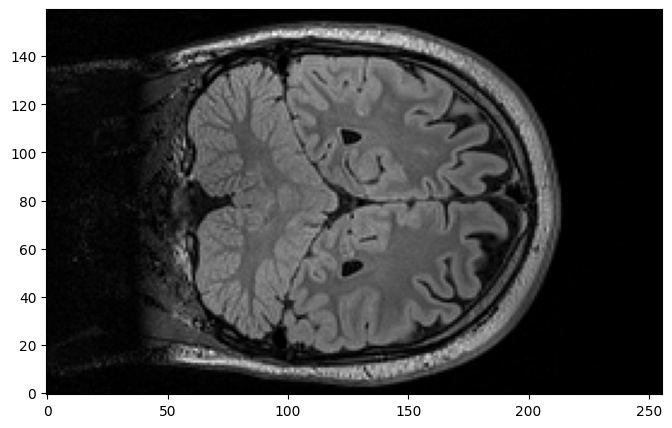

In [ ]:
file_path = f'sub-00001/anat/sub-00001_acq-T2sel_FLAIR.nii.gz'
img_tensor = torch.tensor(load_nii(file_path), dtype=torch.float32).unsqueeze(0)

slice_x = img_tensor[0, img_tensor.shape[0] // 2, :, :].numpy()  # Sagittal slice
slice_y = img_tensor[0, :, img_tensor.shape[1] // 2, :].numpy()  # Coronal slice
slice_z = img_tensor[0, :, :, img_tensor.shape[2] // 2].numpy()  # Axial slice

print(f"Shape of the MRI image: {slice_y.shape}")

plt.figure(figsize=(15, 5))
plt.imshow(slice_y, cmap="gray", origin="lower")

In [23]:
input = torch.tensor(slice_y, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
print(f"Shape of the input tensor: {input.shape}")

Shape of the input tensor: torch.Size([1, 1, 160, 256])


In [55]:
from PIL import Image
from torchvision import transforms
from torchsummary import summary

if __name__ == "__main__":
    model = Unet(3, 1)

    input_MRI = torch.tensor(slice_y, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

    # Load the image
    image_path = 'test_img/car.jpeg'
    image = Image.open(image_path)

    # Transform the image to tensor
    transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
    ])

    input_image = transform(image).unsqueeze(0)
    print(f"Shape of the input image tensor: {input_image.shape}")

Shape of the input image tensor: torch.Size([1, 3, 256, 256])


torch.Size([1, 1, 256, 256])


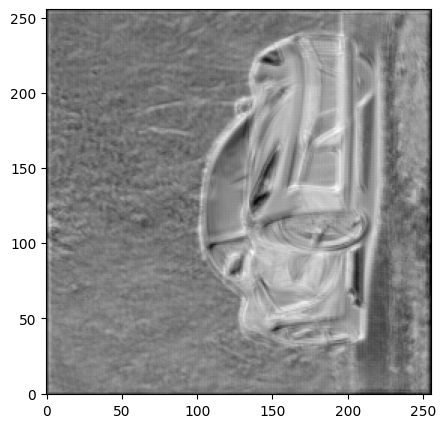

In [59]:

output = model(input_image)
print(output.size())
# summary(model, input)

plt.figure(figsize=(15, 5))
plt.imshow(output.detach().numpy()[0, 0, :, :].T,cmap='gray', origin="lower")

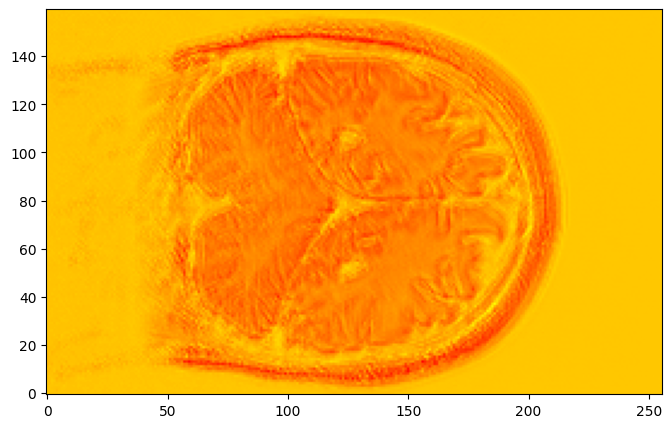

In [28]:
plt.figure(figsize=(15, 5))
plt.imshow(output.detach().numpy()[0, 0, :, :], cmap="autumn", origin="lower")
